In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [161]:
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')

test_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
0,299,26.10.2011,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605,0,404,3490,3894
1,458,02.04.2012,2.0,1,4,0,1,1,1,17.3565,0.427513,75.65220,0.312139,518,0,1208,4728,5936
2,687,17.11.2012,4.0,1,11,0,6,0,1,13.0000,0.326383,81.81255,0.179729,766,0,1313,4316,5629
3,346,12.12.2011,4.0,0,12,0,-1,1,1,9.5333,0.270196,NaN,0.063450,739,0,143,3167,3310
4,291,18.10.2011,4.0,0,10,0,2,1,2,21.3000,0.522721,105.25005,0.110087,463,0,637,4111,4748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,426,01.03.2012,1.0,1,3,0,4,1,1,19.4333,0.475371,92.31255,0.226987,777,0,325,4665,4990
128,547,30.06.2012,3.0,1,6,0,6,0,1,30.6000,0.687508,90.18750,0.161071,981,0,1455,4232,5687
129,271,28.09.2011,4.0,0,9,0,-1,1,2,25.4000,0.575158,127.31250,0.148629,577,0,480,3427,3907
130,180,29.06.2011,3.0,0,6,0,3,1,1,29.1333,0.654688,74.68755,0.261821,585,0,848,4377,5225


In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant          600 non-null    int64  
 1   dteday           600 non-null    object 
 2   season           538 non-null    float64
 3   yr               600 non-null    int64  
 4   mnth             600 non-null    int64  
 5   holiday          600 non-null    int64  
 6   weekday          600 non-null    int64  
 7   workingday       600 non-null    int64  
 8   weathersit       600 non-null    int64  
 9   temp             600 non-null    float64
 10  atemp            600 non-null    float64
 11  hum              566 non-null    float64
 12  windspeed        600 non-null    float64
 13  leaflets         600 non-null    int64  
 14  price reduction  600 non-null    int64  
 15  casual           600 non-null    int64  
 16  registered       600 non-null    int64  
 17  cnt             

In [163]:
sorted_df = train_df.sort_values(by=['instant'])

index_train_df = sorted_df.set_index('instant')

index_train_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095


In [164]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')


handled_season = imp_most_freq.fit_transform(index_train_df['season'].to_numpy().reshape(-1, 1))

handled_season


index_train_df['season'] = handled_season




In [165]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

handled_hum = imp_median.fit_transform(index_train_df['hum'].to_numpy().reshape(-1, 1))

index_train_df['hum'] = handled_hum 

In [166]:
index_train_df = index_train_df.astype({'yr':'float', 'mnth':'float', 'holiday':'float', 'weekday':'float', 'workingday':'float',  'weathersit':'float',  'leaflets':'float',  'price reduction':'float',  'casual':'float',  'registered':'float',  'cnt':'float'})
#index_train_df['dteday'] = pd.to_datetime(index_df2['dteday'], format='%d.%M.%Y')
#index_df2.info()

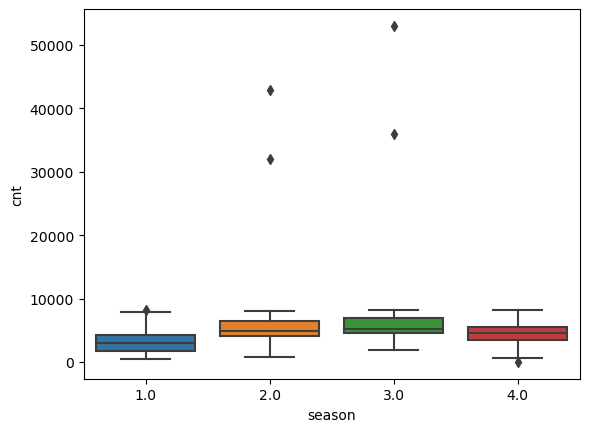

In [167]:
sns.boxplot(x='season', y='cnt', data=index_train_df)
plt.show()

Scaling

In [168]:
scaler = preprocessing.MinMaxScaler()

print(scaler.fit(index_train_df.iloc[:, 1:]))

print("Max values: ",scaler.data_max_)
print("Min values: ",scaler.data_min_)

normed_data = scaler.transform(index_train_df.iloc[:, 1:])

print(normed_data)

MinMaxScaler()
Max values:  [4.00000e+00 1.00000e+00 1.20000e+01 1.00000e+00 6.00000e+00 1.00000e+00
 3.00000e+00 3.44667e+01 8.26371e-01 1.45875e+02 5.07463e-01 1.03200e+03
 1.00000e+00 4.71380e+04 6.94600e+03 5.30210e+04]
Min values:  [ 1.000000e+00  0.000000e+00  1.000000e+00  0.000000e+00 -1.000000e+00
  0.000000e+00  1.000000e+00  2.365200e+00  7.906960e-02  2.818755e+01
 -1.000000e+00  4.590000e+02  0.000000e+00  2.000000e+00  2.000000e+01
  2.200000e+01]
[[0.         0.         0.         ... 0.0069798  0.09153913 0.01817015]
 [0.         0.         0.         ... 0.00273676 0.09384926 0.01469839]
 [0.         0.         0.         ... 0.00250339 0.17455963 0.02503821]
 ...
 [0.         1.         1.         ... 0.01362016 0.35099625 0.05798223]
 [0.         1.         1.         ... 0.00333079 0.16777361 0.02488726]
 [0.         1.         1.         ... 0.00927105 0.32775051 0.05107644]]


In [169]:
#Calculate Mahalanobis distance
#import numpy as np
#import pandas as pd
#import scipy as stats

# calculateMahalanobis function to calculate the Mahalanobis distance
#def calculateMahalanobis(y=None, data=None, cov=None):
#    y_mu = y - np.mean(data)
#    if not cov:
#        cov = np.cov(data.values.T)
#        inv_covmat = np.linalg.inv(cov)
#        left = np.dot(y_mu, inv_covmat)
#        mahal = np.dot(left, y_mu.T)
#        return mahal.diagonal()


# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
#index_train_df['calculateMahalanobis'] = calculateMahalanobis(y=index_train_df.iloc[:, 1:], 
#                                                  data=index_train_df.iloc[:, 1:])

# Display the dataframe
#index_train_df

In [170]:
df2 = pd.DataFrame(normed_data, columns=index_train_df.columns[1:])
df2['dteday'] = index_train_df['dteday']

In [171]:
index_train_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0.0,1.0,0.0,6.0,0.0,2.0,13.7667,0.363625,120.87495,0.160446,755.0,0.0,331.0,654.0,985.0
2,02.01.2011,1.0,0.0,1.0,0.0,0.0,0.0,2.0,14.5391,0.353739,104.41305,0.248539,837.0,1.0,131.0,670.0,801.0
3,03.01.2011,1.0,0.0,1.0,0.0,1.0,1.0,1.0,7.8546,0.189405,65.59095,0.248309,829.0,0.0,120.0,1229.0,1349.0
4,04.01.2011,1.0,0.0,1.0,0.0,2.0,1.0,1.0,8.0000,0.212122,88.56525,0.160296,734.0,0.0,108.0,1454.0,1562.0
5,05.01.2011,1.0,0.0,1.0,0.0,3.0,1.0,1.0,9.0783,0.229270,65.54355,0.186900,745.0,0.0,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1.0,12.0,0.0,3.0,1.0,3.0,9.7333,0.220333,123.49995,0.316546,701.0,0.0,9.0,432.0,441.0
727,27.12.2012,1.0,1.0,12.0,0.0,4.0,1.0,2.0,10.1667,0.226642,97.93755,0.350133,561.0,0.0,247.0,1867.0,2114.0
728,28.12.2012,1.0,1.0,12.0,0.0,5.0,1.0,2.0,10.1333,0.255046,88.50000,0.155471,562.0,0.0,644.0,2451.0,3095.0


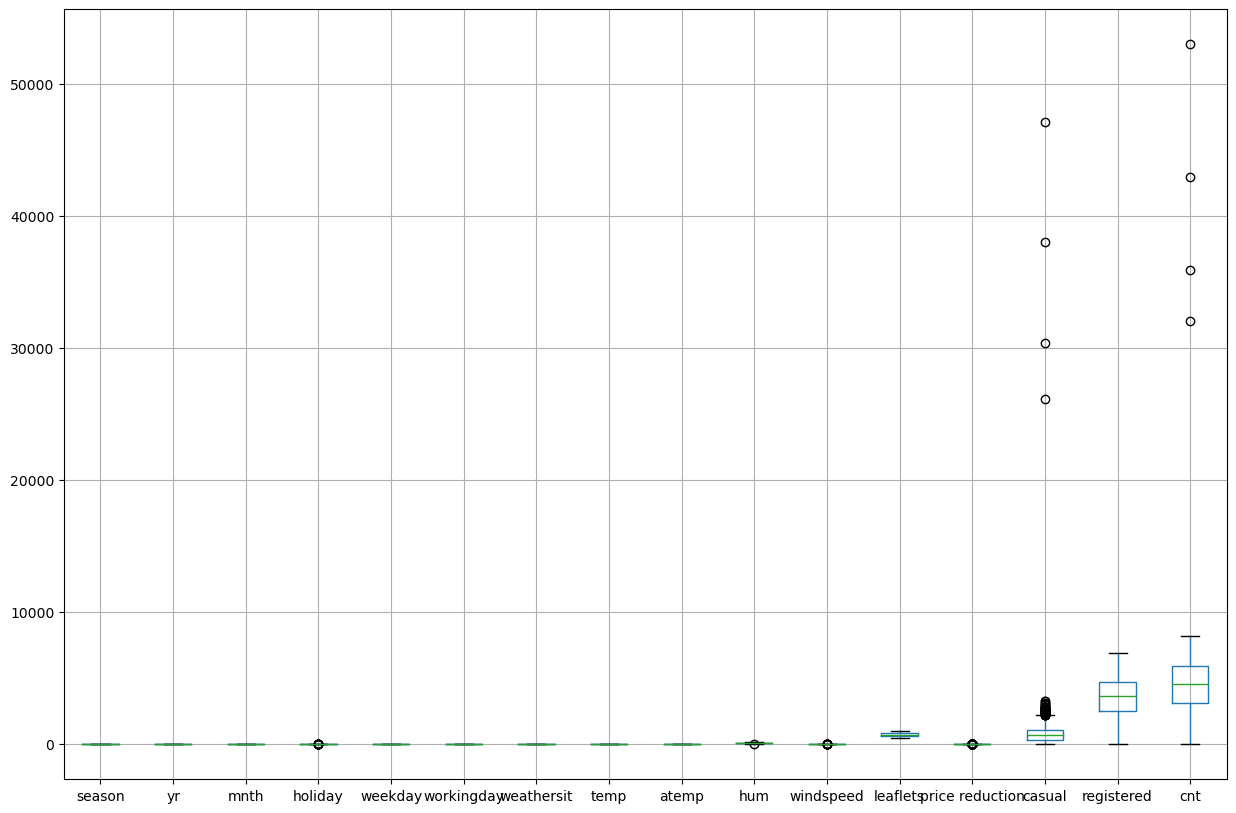

In [175]:
boxplot = index_train_df.iloc[:, 1:].boxplot(figsize=(15, 10))
plt.show()

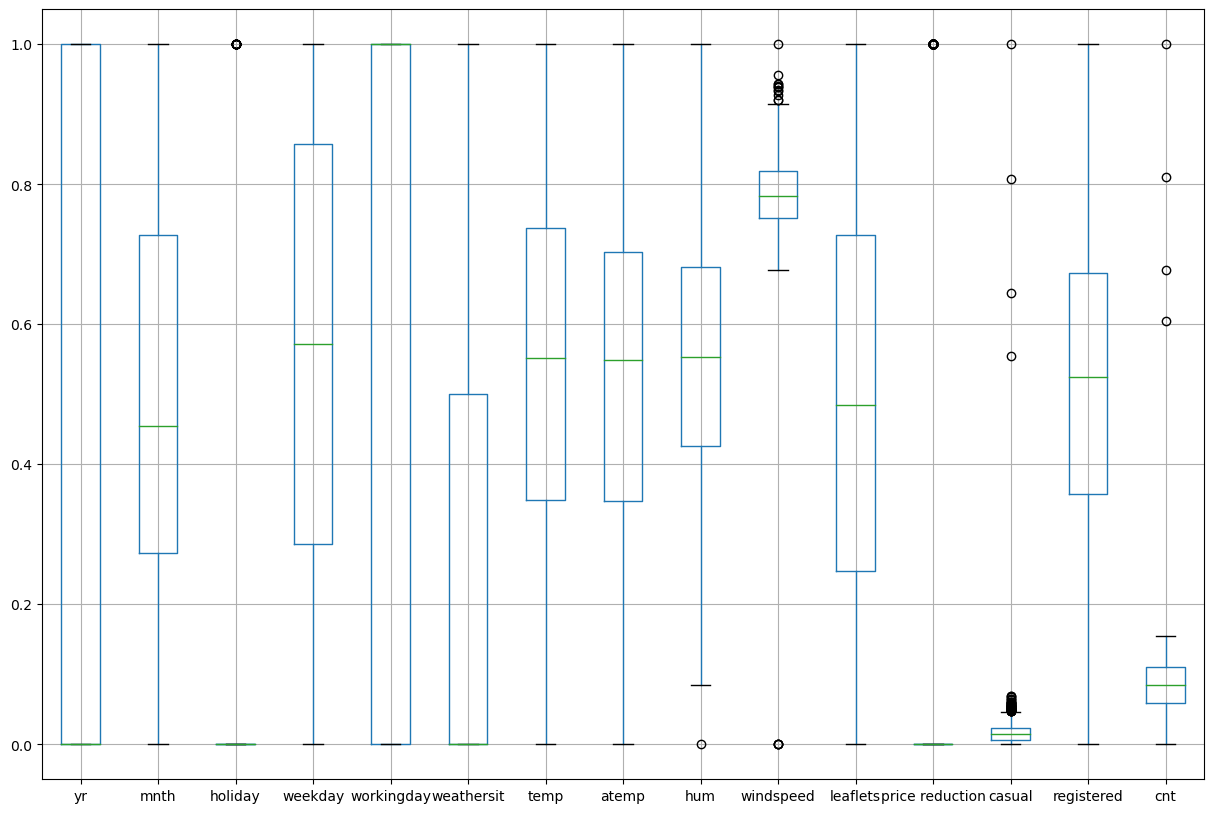

In [176]:
boxplot = df2.iloc[:, 1:].boxplot(figsize=(15, 10))
plt.show()